**On Cancer Clusters.**

Firstly I began this project by hypothisizing on the data set given, in this case the data set is actuallly a map of bombing locations in London. According to the book we are supposed to imagine each of these dots are actually homes of sick individuals (People with cancer.)

I began with the Idea that each cluster of cancer was actually a null. In this case meaning that there was no corelation between each house that had someone with cancer in it.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson

This project is seperated into two major pieces

---

The first portion will be answering the questions in the book



---

The seccond will be answering questions I had and discussion on this topic.



---

First create a graphical representation of these points.

The data shows some clusters. Suppose that someone asks you to investigate the cause of one particular cluster. Before you start looking for neuclear reactors or cell-phone towers, however, the first thing to check is the "null hypothesis": Maybe these are just points randomly drawn from a Uniform distribution. There's no way to prove that a single instance of dots "is random". But we can try to make a quantitative prediction from the hypothesis and then check whether the data roughly obey it.

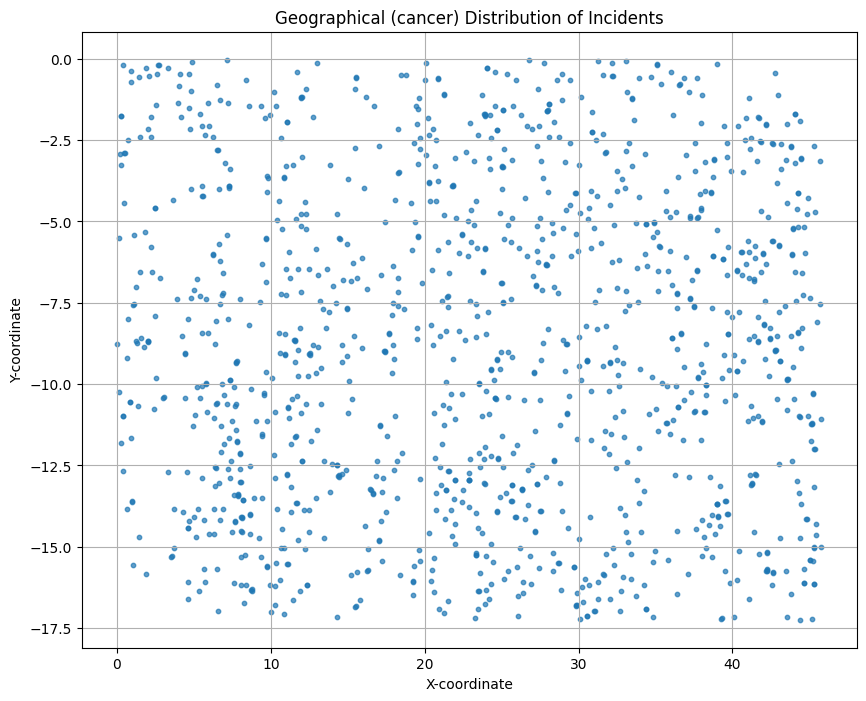

In [6]:
data = np.load('/content/londonIncidents.npz')
coord = data['all']

plt.figure(figsize=(10, 8))
plt.scatter(coord[:, 0], coord[:, 1], s=10, alpha=0.7)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Geographical (cancer) Distribution of Incidents')
plt.grid(True)

plt.show()

The graph above shows the map of incidents assuming these are cancer locations the darker the dot the more overlaping cancer diagnosis are present in the given area.

Add vertical lines to your plot dividing it into N equal strips, either with your computer or by drawing on a hard copy of your plot. Choose a value N somewhere between 10 and 20. Also add M horizontal lines dividing it into equal strips. Thus, you have divided your graph into a grid of NM grid cells. (Whats wrong with setting up fewer than 100 cells? Whats wrong with more than 400?)

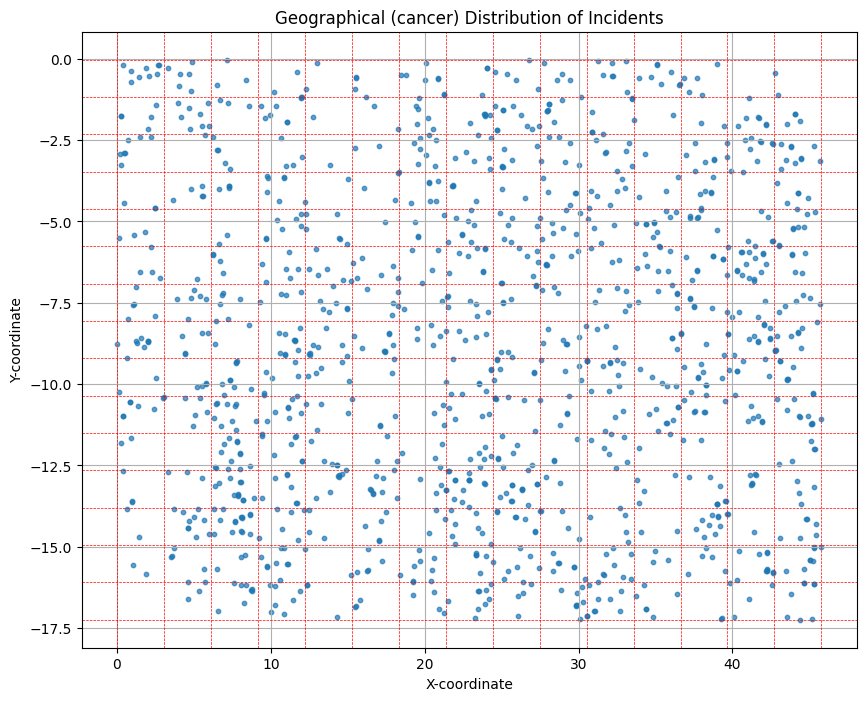

In [7]:
data = np.load('/content/londonIncidents.npz')
coord = data['all']

plt.figure(figsize=(10, 8))
plt.scatter(coord[:, 0], coord[:, 1], s=10, alpha=0.7)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Geographical (cancer) Distribution of Incidents')
plt.grid(True)

N = 15
M = 15
x_min, x_max = coord[:, 0].min(), coord[:, 0].max()
y_min, y_max = coord[:, 1].min(), coord[:, 1].max()

x_lines = np.linspace(x_min, x_max, N + 1)
for x_coord in x_lines:
    plt.axvline(x=x_coord, color='r', linestyle='--', linewidth=0.5)

y_lines = np.linspace(y_min, y_max, M + 1)
for y_coord in y_lines:
    plt.axhline(y=y_coord, color='r', linestyle='--', linewidth=0.5)

plt.show()

The size of this grid matters because it changes how many data points fit into one protion of the created grid. With only 100 there are too many data points in the grid, with 400 there are too few data points in the grid.

Count how many dots lie in each of the cells. Tally up how many cells have 0,1,... dots in them. That gives you a frequency F(l) to find l dots in the cell, and hence an estimate for the probability P_est(l)=F(l)/NM that a cell will have l dots. the average number of dots per cell is the total number divided by NM.

In [14]:
x_ind = np.digitize(coord[:, 0], x_lines) - 1
x_ind = np.clip(x_ind, 0, N - 1)
y_ind = np.digitize(coord[:, 1], y_lines) - 1
y_ind = np.clip(y_ind, 0, M - 1)

grid_cells = np.column_stack((x_ind, y_ind))

In [36]:
incid_per = np.zeros((N, M), dtype=int)
for x_idx, y_idx in grid_cells:
    incid_per[x_idx, y_idx] += 1

print(f"Shape of incident counts per cell: {incid_per.shape}")
print(f"First few rows of incident counts per cell:\n{incid_per[:5, :5]}")
print(f"Total incidents counted: {incid_per.sum()}")

cell_count = incid_per.flatten()
max_incidents_in_a_cell = cell_count.max()
freq = np.bincount(cell_count, minlength=max_incidents_in_a_cell + 1)

NM = N * M
prob = freq / NM
avg_incidl = incid_per.sum() / NM
tot_incid = coord.shape[0]

Shape of incident counts per cell: (15, 15)
First few rows of incident counts per cell:
[[ 0  2  2  3  2]
 [ 4  4 10  3  0]
 [ 8  3 15 12 13]
 [ 7  9  6  7  8]
 [ 3  2  3  6  6]]
Total incidents counted: 1238


A good way to see the counted number of incidents per cell is with a heat map.

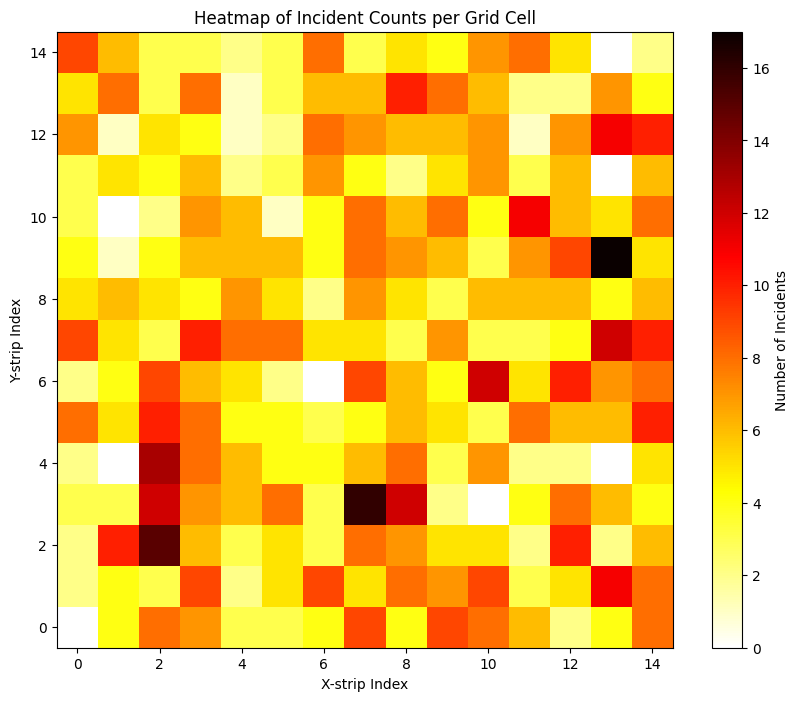

In [37]:
plt.figure(figsize=(10, 8))
plt.imshow(incident_per.T, cmap='hot_r', origin='lower')
plt.colorbar(label='Number of Incidents')
plt.xlabel('X-strip Index')
plt.ylabel('Y-strip Index')
plt.title('Heatmap of Incident Counts per Grid Cell')
plt.show()

If we had a huge map with lots of cells, and dots distributed Uniformly and independently over that map with an average of mu per cell, then the actual number observed in a cell would follow a particular probability distribution. What is it? Overlay a graph of the estimated distribution P_est that you obtained in (c). Does the resulting picture seem to support the null hypothesis?

The probability distribution that models the average of mu per cell is a Poisson distribution. I mainly know this because it is the first graph I overlayed and it matched the best.

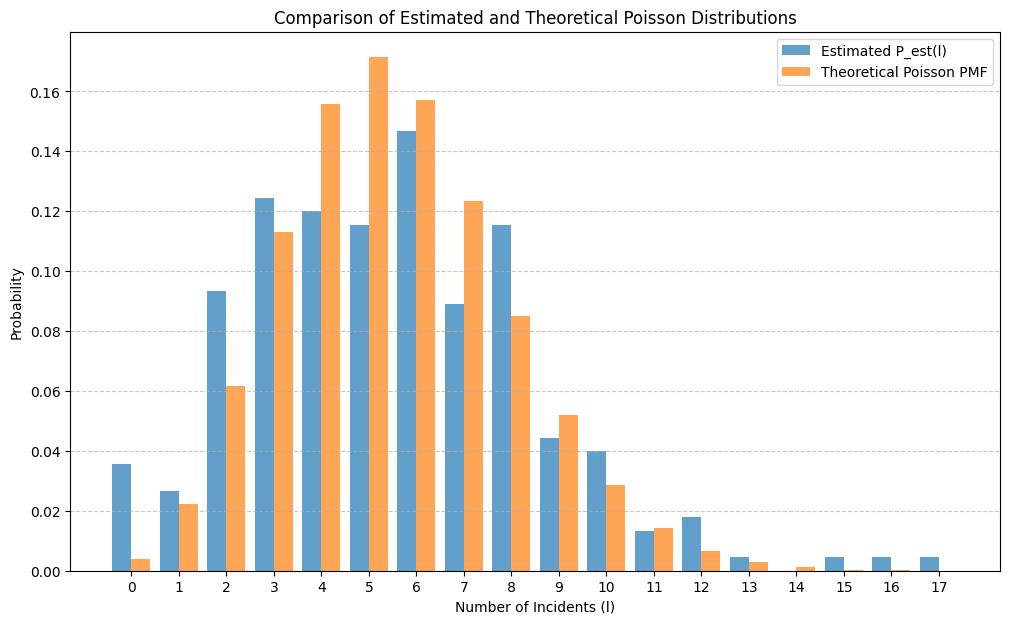

In [27]:
from scipy.stats import poisson
l_val = np.arange(len(prob))

poisson = poisson.pmf(l_val, mu=avg_incidl)

plt.figure(figsize=(12, 7))
plt.bar(l_val - 0.2, prob, width=0.4, label='Estimated P_est(l)', alpha=0.7)
plt.bar(l_val + 0.2, poisson, width=0.4, label='Theoretical Poisson PMF', alpha=0.7)
plt.xlabel('Number of Incidents (l)')
plt.ylabel('Probability')
plt.title('Comparison of Estimated and Theoretical Poisson Distributions')
plt.xticks(l_val)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Because l matches the Poission distribution super well this means that the null hypothesis is very supported.

For comparison, generate simulated data points that are Uniformly distributed over the region shown, and repeat the above steps.

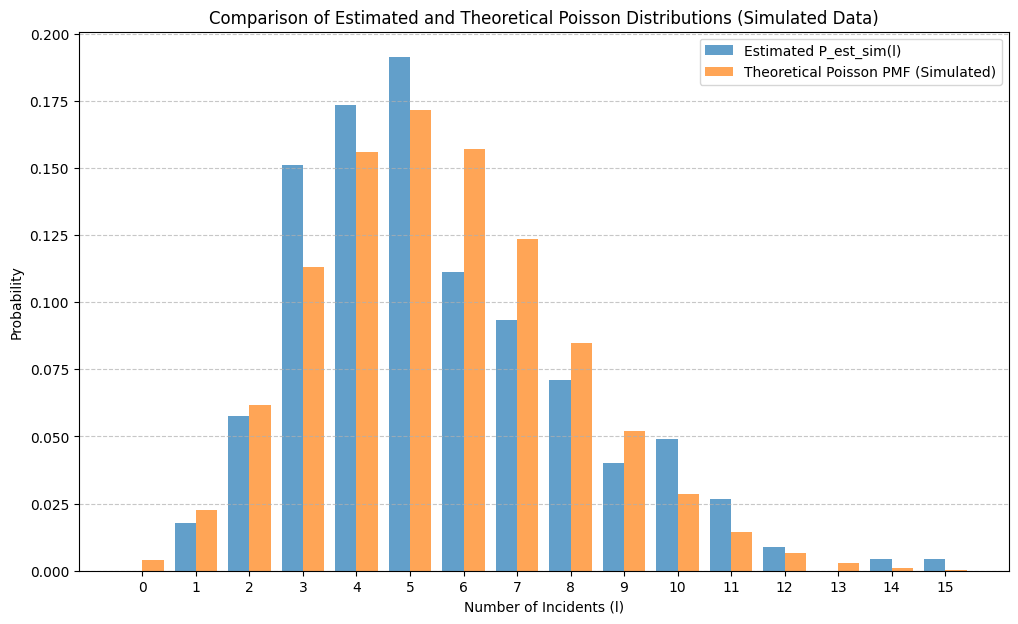

In [34]:
x_min, x_max = coord[:, 0].min(), coord[:, 0].max()
y_min, y_max = coord[:, 1].min(), coord[:, 1].max()

total_incidents = coord.shape[0]

simulated_x = np.random.uniform(x_min, x_max, total_incidents)
simulated_y = np.random.uniform(y_min, y_max, total_incidents)
simulated_coord = np.column_stack((simulated_x, simulated_y))
x_ind_sim = np.digitize(simulated_coord[:, 0], x_lines) - 1
x_ind_sim = np.clip(x_ind_sim, 0, N - 1)
y_ind_sim = np.digitize(simulated_coord[:, 1], y_lines) - 1
y_ind_sim = np.clip(y_ind_sim, 0, M - 1)

grid_cells_sim = np.column_stack((x_ind_sim, y_ind_sim))

simulated_incid_per_cell = np.zeros((N, M), dtype=int)
for x_idx, y_idx in grid_cells_sim:
    simulated_incid_per_cell[x_idx, y_idx] += 1

simulated_cell_count = simulated_incid_per_cell.flatten()
max_sim_incidents_in_a_cell = simulated_cell_count.max()

freq_sim = np.bincount(simulated_cell_count, minlength=max_sim_incidents_in_a_cell + 1)
prob_sim = freq_sim / NM
avg_incidl_sim = simulated_incid_per_cell.sum() / NM
l_val_sim = np.arange(len(prob_sim))
poisson_sim_pmf_values = poisson_dist.pmf(l_val_sim, mu=avg_incidl_sim)

plt.figure(figsize=(12, 7))
plt.bar(l_val_sim - 0.2, prob_sim, width=0.4, label='Estimated P_est_sim(l)', alpha=0.7)
plt.bar(l_val_sim + 0.2, poisson_sim_pmf_values, width=0.4, label='Theoretical Poisson PMF (Simulated)', alpha=0.7)
plt.xlabel('Number of Incidents (l)')
plt.ylabel('Probability')
plt.title('Comparison of Estimated and Theoretical Poisson Distributions (Simulated Data)')
plt.xticks(l_val_sim)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

I also decided to include a heat map of the avg number of dots in the cell as this helps with visualizing how there is not a corelation in incidents.

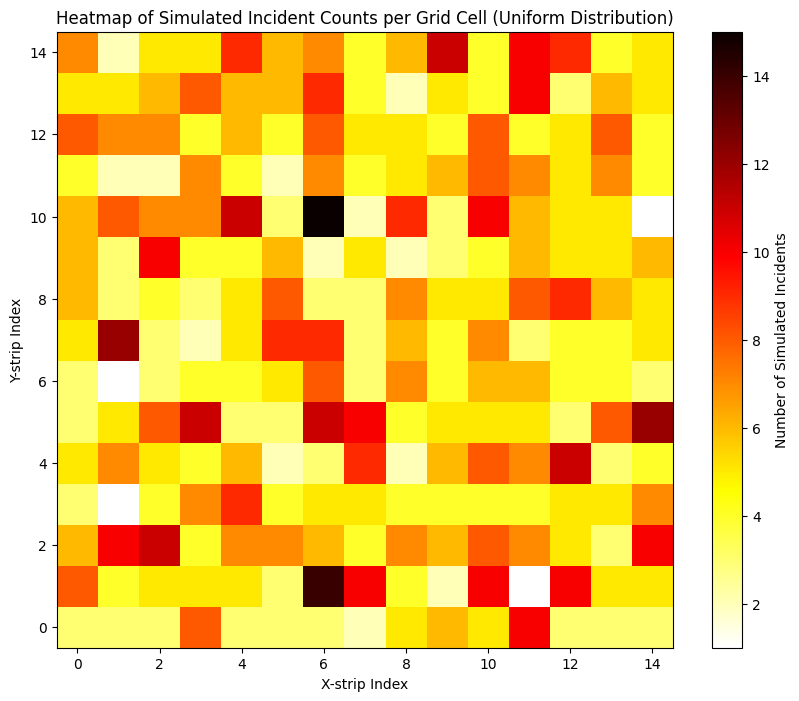

In [35]:
plt.figure(figsize=(10, 8))
plt.imshow(simulated_incid_per_cell.T, cmap='hot_r', origin='lower')
plt.colorbar(label='Number of Simulated Incidents')
plt.xlabel('X-strip Index')
plt.ylabel('Y-strip Index')
plt.title('Heatmap of Simulated Incident Counts per Grid Cell (Uniform Distribution)')
plt.show()

It is easy to see here that the simulated data matches the Poission distribution only slightly better than the actual data as far as the distribution on the overlayed graph between 3 and 7.



---

I mainly had one issue with these questions and also with this project in general. That being; it feels as though there should be a corelation between cancer incidents and location.


Upon further research I found my answer from some rather trustworthy sources (https://pmc.ncbi.nlm.nih.gov/articles/PMC4074316/, https://www.cdc.gov/united-states-cancer-statistics/technical-notes/guidance.html, https://pmc.ncbi.nlm.nih.gov/articles/PMC4548344/) There is a corelation between the geographical region and the cancer rates in an area. More often than not there is a positive corelation between cancer rates and geographical area. With Urban populations having higher cancer rates on average compared to the rural populations.


I was not satisfied with this answer though, as every data set from kaggle that demonstrated cancer rates in a given urban population looked exactly like the above data used in this project. (using 500_Cities__Cancer__excluding_skin_cancer__among_adults_aged___18_years.csv, from https://www.kaggle.com/datasets/naveedurrehman787/500-cities-cancer-dataset.)

In [63]:
import zipfile
import os

zip_file_path = '/content/500_Cities__Cancer__excluding_skin_cancer__among_adults_aged___18_years.csv.zip'
extraction_dir = 'cancer_data_500_cities'

os.makedirs(extraction_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)


First 5 rows of the DataFrame:
   Year StateAbbr   StateDesc     CityName GeographicLevel DataSource  \
0  2017        CA  California  Chula Vista            City      BRFSS   
1  2017        CA  California     El Monte            City      BRFSS   
2  2017        CA  California      Lynwood            City      BRFSS   
3  2017        CA  California       Perris            City      BRFSS   
4  2017        CA  California      Redding            City      BRFSS   

          Category UniqueID  \
0  Health Outcomes  0613392   
1  Health Outcomes  0622230   
2  Health Outcomes  0644574   
3  Health Outcomes  0656700   
4  Health Outcomes  0659920   

                                             Measure Data_Value_Unit  ...  \
0  Cancer (excluding skin cancer) among adults ag...               %  ...   
1  Cancer (excluding skin cancer) among adults ag...               %  ...   
2  Cancer (excluding skin cancer) among adults ag...               %  ...   
3  Cancer (excluding skin cancer) a

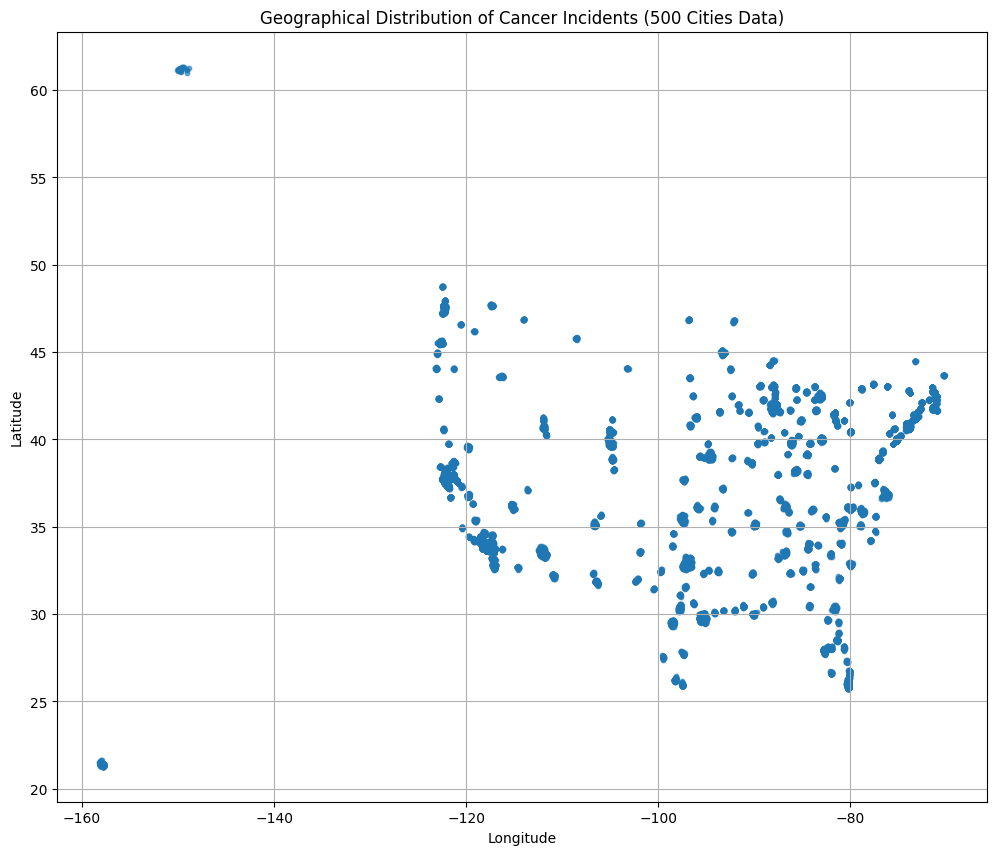

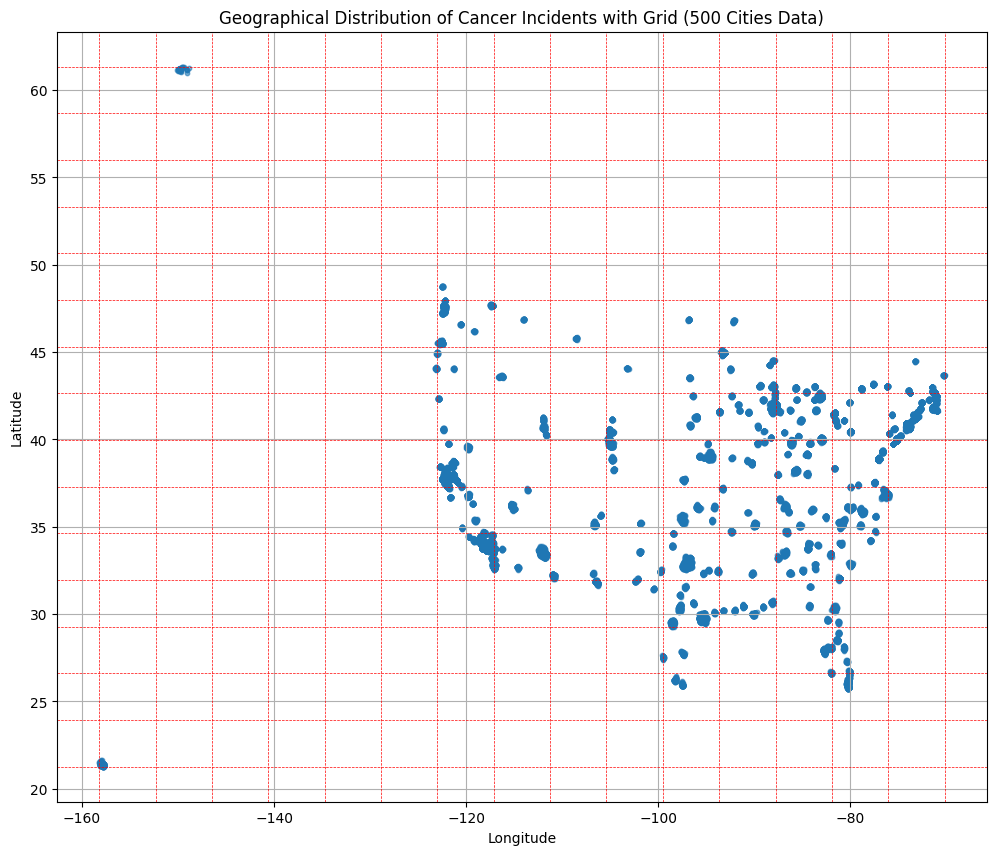

In [64]:
csv_file_path = os.path.join(extraction_dir, '500_Cities__Cancer__excluding_skin_cancer__among_adults_aged___18_years.csv')
df_500_cities_cancer = pd.read_csv(csv_file_path)

print("First 5 rows of the DataFrame:")
print(df_500_cities_cancer.head())

def parse_geolocation(geo_string):
    if pd.isna(geo_string):
        return None, None
    parts = geo_string.strip('()').split(', ')
    if len(parts) == 2:
        try:
            return float(parts[0]), float(parts[1])
        except ValueError:
            return None, None
    return None, None

df_500_cities_cancer['Latitude'], df_500_cities_cancer['Longitude'] = zip(*df_500_cities_cancer['GeoLocation'].apply(parse_geolocation))
df_coords = df_500_cities_cancer.dropna(subset=['Latitude', 'Longitude'])
cancer_coordinates = df_coords[['Longitude', 'Latitude']].values

plt.figure(figsize=(12, 10))
plt.scatter(cancer_coordinates[:, 0], cancer_coordinates[:, 1], s=10, alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Cancer Incidents (500 Cities Data)')
plt.grid(True)
plt.show()

N = 15
M = 15

x_min, x_max = cancer_coordinates[:, 0].min(), cancer_coordinates[:, 0].max()
y_min, y_max = cancer_coordinates[:, 1].min(), cancer_coordinates[:, 1].max()

x_lines = np.linspace(x_min, x_max, N + 1)
y_lines = np.linspace(y_min, y_max, M + 1)

plt.figure(figsize=(12, 10))
plt.scatter(cancer_coordinates[:, 0], cancer_coordinates[:, 1], s=10, alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Cancer Incidents with Grid (500 Cities Data)')
plt.grid(True)

for x_coord in x_lines:
    plt.axvline(x=x_coord, color='r', linestyle='--', linewidth=0.5)

for y_coord in y_lines:
    plt.axhline(y=y_coord, color='r', linestyle='--', linewidth=0.5)

plt.show()

In [65]:
x_ind_500_cities = np.digitize(cancer_coordinates[:, 0], x_lines) - 1
x_ind_500_cities = np.clip(x_ind_500_cities, 0, N - 1)

y_ind_500_cities = np.digitize(cancer_coordinates[:, 1], y_lines) - 1
y_ind_500_cities = np.clip(y_ind_500_cities, 0, M - 1)

grid_cells_500_cities = np.column_stack((x_ind_500_cities, y_ind_500_cities))

incid_per_500_cities = np.zeros((N, M), dtype=int)
for x_idx, y_idx in grid_cells_500_cities:
    incid_per_500_cities[x_idx, y_idx] += 1

print(f"First few rows of incident counts per cell (500 Cities):\n{incid_per_500_cities[:5, :5]}")
print(f"Total incidents counted (500 Cities): {incid_per_500_cities.sum()}")

cell_count_500_cities = incid_per_500_cities.flatten()
max_incidents_in_a_cell_500_cities = cell_count_500_cities.max()

freq_500_cities = np.bincount(cell_count_500_cities, minlength=max_incidents_in_a_cell_500_cities + 1)

NM_500_cities = N * M
prob_500_cities = freq_500_cities / NM_500_cities
avg_incidl_500_cities = incid_per_500_cities.sum() / NM_500_cities
tot_incid_500_cities = cancer_coordinates.shape[0]
l_val_500_cities = np.arange(len(prob_500_cities))
poisson_pmf_500_cities = poisson_dist_func.pmf(l_val_500_cities, mu=avg_incidl_500_cities)

mask = (prob_500_cities > 0) & (l_val_500_cities > 0)
l_val_500_cities_filtered = l_val_500_cities[mask]
prob_500_cities_filtered = prob_500_cities[mask]
poisson_pmf_500_cities_filtered = poisson_pmf_500_cities[mask]

plt.figure(figsize=(12, 7))
plt.bar(l_val_500_cities_filtered - 0.2, prob_500_cities_filtered, width=0.4, label='Estimated P_est(l) (500 Cities)', alpha=0.7)
plt.bar(l_val_500_cities_filtered + 0.2, poisson_pmf_500_cities_filtered, width=0.4, label='Theoretical Poisson PMF (500 Cities)', alpha=0.7)
plt.xlabel('Number of Incidents (l)')
plt.ylabel('Probability')
plt.title('Comparison of Estimated and Theoretical Poisson Distributions (500 Cities Data) - Excluding 0 Incidents')
plt.xticks(l_val_500_cities_filtered)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

I couldn't get the Poisson graph to look correct, however, I believe it is showing the same data as shown above. As seen with the heat map.

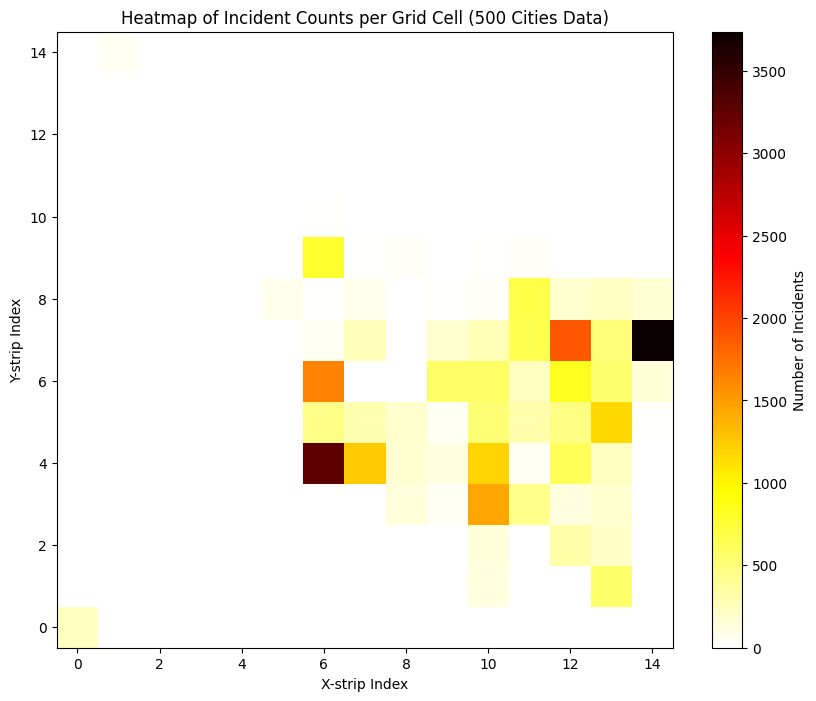

In [53]:
plt.figure(figsize=(10, 8))
plt.imshow(incid_per_500_cities.T, cmap='hot_r', origin='lower')
plt.colorbar(label='Number of Incidents')
plt.xlabel('X-strip Index')
plt.ylabel('Y-strip Index')
plt.title('Heatmap of Incident Counts per Grid Cell (500 Cities Data)')
plt.show()

As it appears overall there is not a corelation within the geographical areas. In other words there is a difference between urban and rural, but within the urban and within the rual there is not a difference in cancer diagnosis.

This was by far the most interesting thing I discovered about this, though it makes sense in heindsight there are likely other factors that make up for the fact that the rural area has much less cancer diagnosis compared to the urban populations.